# Assignment 1: Let the Tensors Flow
By Joy Rakshit(231681), Geetha Doddapaneni Gopinath (229498), Sri Chandana Hudukula Ram Kumar (231616)

Reference: http://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html

Setting working Directory

In [123]:
from google.colab import drive; drive.mount('/content/drive')
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
os.chdir("/content/drive/My Drive/IDL/")
os.getcwd()


'/content/drive/My Drive/IDL'

Libraries

In [126]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

# Loading data and sanity checking

(60000, 28, 28)

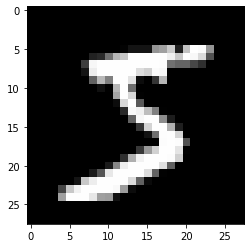

In [127]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
train_images.shape

# ***Train Function***

In [159]:
def mlp_model(train_steps,learning_rate,actn_func,hidden_size):

  #Keeping the record of Loss and Accuracy after 100 iterations
  train_loss=[]
  train_acc=[]

  #Input layer initialisation
  W = tf.Variable(tf.random.uniform([784, hidden_size],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32)) 
  b = tf.Variable(np.ones(hidden_size, dtype=np.float32))

  # 1 hidden layer initialisation
  W1 = tf.Variable(tf.random.uniform([hidden_size, 10],minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
  b1 = tf.Variable(np.zeros(10, dtype=np.float32))

  print("-----------------TRAINING PARAMETERS-----------------")
  print("Training_Steps: {} Learning Rate: {} Activation_Function:{} Hidden_Layer_Size:{}".format(train_steps,learning_rate,actn_func,hidden_size))
  print("-----------------TRAINING-----------------")
  for step in range(train_steps):
    #loading dataset
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
      if(actn_func == 'Relu'):
        h1=tf.nn.relu(tf.matmul(img_batch, W)+b)
      elif(actn_func == 'Sigmoid'):
        h1=tf.nn.sigmoid(tf.matmul(img_batch, W)+b)
      elif(actn_func == 'Tanh'):
        h1=tf.nn.tanh(tf.matmul(img_batch, W)+b)
      elif(actn_func == 'Leaky Relu'):
        h1=tf.nn.leaky_relu(tf.matmul(img_batch, W)+b)
      logits = tf.matmul(h1, W1) + b1
      xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
    np.append(train_loss,xent)

    #gradients
    grads = tape.gradient(xent, [W, b, W1, b1])

    #updating weights and bias
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    W1.assign_sub(learning_rate * grads[2])
    b1.assign_sub(learning_rate * grads[3])

    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        train_acc.append(acc.numpy())
        train_loss.append(xent.numpy())
        print("Loss: {} Accuracy: {}".format(xent, acc))
  return W, b, W1, b1,train_loss,train_acc

# ***Test Function***

In [158]:
def predict(W, b, W1, b1,actn_func):
  print("-----------------TESTING-----------------")
  input_h1 = tf.matmul(data.test_data, W) + b
  if(actn_func == 'Relu'):
    output_h1 = tf.nn.relu(input_h1)
  elif(actn_func == 'Sigmoid'):
    output_h1=tf.nn.sigmoid(input_h1)
  elif(actn_func == 'Tanh'):
    output_h1=tf.nn.tanh(input_h1)
  elif(actn_func == 'Leaky Relu'):
    output_h1=tf.nn.leaky_relu(input_h1)
  
  #Prediction
  test_preds = tf.argmax(tf.matmul(output_h1, W1) + b1, axis=1, output_type=tf.int32)

  #Calculating accuracy
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
  print('Accuracy of the model on test data set is:{}'.format(acc))
  return

# ***Training and Testing Model - 1***

*   **Activation_Func = Relu**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 60**




In [142]:
W_60_Relu, b_60_Relu, W1_60_Relu, b1_60_Relu,loss_relu_h60,acc_relu_h60 = mlp_model(1000,0.1,'Relu',60)
predict(W_60_Relu, b_60_Relu, W1_60_Relu, b1_60_Relu,'Relu')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Relu Hidden_Layer_Size:60
-----------------TRAINING-----------------
Loss: 2.379683256149292 Accuracy: 0.0859375
Loss: 0.5642431974411011 Accuracy: 0.859375
Loss: 0.4698163866996765 Accuracy: 0.8828125
Loss: 0.37531280517578125 Accuracy: 0.8671875
Loss: 0.49713340401649475 Accuracy: 0.8515625
Starting new epoch...
Loss: 0.31497934460639954 Accuracy: 0.9140625
Loss: 0.29201483726501465 Accuracy: 0.921875
Loss: 0.2574215233325958 Accuracy: 0.921875
Loss: 0.4284428358078003 Accuracy: 0.875
Loss: 0.17459341883659363 Accuracy: 0.953125
Starting new epoch...
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9258999824523926


# ***Training and Testing Model - 2***

*   **Activation_Func = Leaky Relu**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 60**


In [144]:
W_60_LeakyRelu, b_60_LeakyRelu, W1_60_LeakyRelu, b1_60_LeakyRelu,loss_LeakyRelu_h60,acc_LeakyRelu_h60 = mlp_model(1000,0.1,'Leaky Relu',60)
predict(W_60_LeakyRelu, b_60_LeakyRelu, W1_60_LeakyRelu, b1_60_LeakyRelu,'Leaky Relu')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Leaky Relu Hidden_Layer_Size:60
-----------------TRAINING-----------------
Loss: 2.584127426147461 Accuracy: 0.0703125
Loss: 0.5927895903587341 Accuracy: 0.84375
Loss: 0.35949572920799255 Accuracy: 0.8828125
Loss: 0.23830005526542664 Accuracy: 0.9375
Starting new epoch...
Loss: 0.24406366050243378 Accuracy: 0.9140625
Loss: 0.2932090163230896 Accuracy: 0.890625
Loss: 0.29456424713134766 Accuracy: 0.8984375
Loss: 0.3053479790687561 Accuracy: 0.921875
Starting new epoch...
Loss: 0.3209484815597534 Accuracy: 0.8828125
Loss: 0.2764284014701843 Accuracy: 0.9375
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9190000295639038


# ***Training and Testing Model - 3***

*   **Activation_Func = Sigmoid**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 60**

In [145]:
W_60_sig, b_60_sig, W1_60_sig, b1_60_sig,loss_sig_h60,acc_sig_h60 = mlp_model(1000,0.1,'Sigmoid',60)
predict(W_60_sig, b_60_sig, W1_60_sig, b1_60_sig,'Sigmoid')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Sigmoid Hidden_Layer_Size:60
-----------------TRAINING-----------------
Loss: 2.4051353931427 Accuracy: 0.0625
Loss: 2.0972366333007812 Accuracy: 0.421875
Loss: 1.5518386363983154 Accuracy: 0.640625
Starting new epoch...
Loss: 1.0642727613449097 Accuracy: 0.7890625
Loss: 0.743638277053833 Accuracy: 0.8671875
Loss: 0.74001544713974 Accuracy: 0.84375
Loss: 0.6328163146972656 Accuracy: 0.859375
Loss: 0.4873691201210022 Accuracy: 0.90625
Starting new epoch...
Loss: 0.5801582932472229 Accuracy: 0.84375
Loss: 0.5027984380722046 Accuracy: 0.890625
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.8924000263214111


# ***Training and Testing Model - 4***

*   **Activation_Func = Hyperbolic Tangent**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 60**

In [146]:
W_60_tanh, b_60_tanh, W1_60_tanh, b1_60_tanh,loss_tanh_h60,acc_tanh_h60 = mlp_model(1000,0.1,'Tanh',60)
predict(W_60_tanh, b_60_tanh, W1_60_tanh, b1_60_tanh,'Tanh')


-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Tanh Hidden_Layer_Size:60
-----------------TRAINING-----------------
Loss: 2.328233480453491 Accuracy: 0.140625
Loss: 0.7956946492195129 Accuracy: 0.8828125
Starting new epoch...
Loss: 0.4679895043373108 Accuracy: 0.8828125
Loss: 0.4393378794193268 Accuracy: 0.8984375
Loss: 0.30038344860076904 Accuracy: 0.9375
Loss: 0.3116796016693115 Accuracy: 0.9453125
Loss: 0.17264053225517273 Accuracy: 0.9765625
Starting new epoch...
Loss: 0.3275287449359894 Accuracy: 0.921875
Loss: 0.23742598295211792 Accuracy: 0.921875
Loss: 0.2601463198661804 Accuracy: 0.9375
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9273999929428101


# ***Training and Testing Model - 5***

*   **Activation_Func = Relu**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 600**

In [147]:
W_600_Relu, b_600_Relu, W1_600_Relu, b1_600_Relu,loss_relu_h600,acc_relu_h600 = mlp_model(1000,0.1,'Relu',600)
predict(W_600_Relu, b_600_Relu, W1_600_Relu, b1_600_Relu,'Relu')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Relu Hidden_Layer_Size:600
-----------------TRAINING-----------------
Loss: 3.278587579727173 Accuracy: 0.125
Loss: 0.4227595627307892 Accuracy: 0.875
Starting new epoch...
Loss: 0.2127390205860138 Accuracy: 0.9609375
Loss: 0.3365931212902069 Accuracy: 0.90625
Loss: 0.4031410813331604 Accuracy: 0.8828125
Loss: 0.3920553922653198 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.336899071931839 Accuracy: 0.90625
Loss: 0.18745359778404236 Accuracy: 0.953125
Loss: 0.3297693729400635 Accuracy: 0.8984375
Loss: 0.20811143517494202 Accuracy: 0.953125
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9344000220298767


# ***Training and Testing Model - 6***

*   **Activation_Func = Leaky Relu**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 600**

In [148]:
W_600_LeakyRelu, b_600_LeakyRelu, W1_600_LeakyRelu, b1_600_LeakyRelu,loss_LeakyRelu_h600,acc_LeakyRelu_h600 = mlp_model(1000,0.1,'Leaky Relu',600)
predict(W_600_LeakyRelu, b_600_LeakyRelu, W1_600_LeakyRelu, b1_600_LeakyRelu,'Leaky Relu')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Leaky Relu Hidden_Layer_Size:600
-----------------TRAINING-----------------
Loss: 3.1056594848632812 Accuracy: 0.078125
Starting new epoch...
Loss: 0.37267494201660156 Accuracy: 0.90625
Loss: 0.2631278932094574 Accuracy: 0.9296875
Loss: 0.3123517334461212 Accuracy: 0.9140625
Loss: 0.3077695965766907 Accuracy: 0.90625
Loss: 0.3193509578704834 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.20128139853477478 Accuracy: 0.9296875
Loss: 0.19883222877979279 Accuracy: 0.9453125
Loss: 0.13397054374217987 Accuracy: 0.9765625
Loss: 0.2073759138584137 Accuracy: 0.9375
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9239000082015991


# ***Training and Testing Model - 7***

*   **Activation_Func = Sigmoid**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 600**

In [149]:
W_600_sig, b_600_sig, W1_600_sig, b1_600_sig,loss_sig_h600,acc_sig_h600 = mlp_model(1000,0.1,'Sigmoid',600)
predict(W_600_sig, b_600_sig, W1_600_sig, b1_600_sig,'Sigmoid')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Sigmoid Hidden_Layer_Size:600
-----------------TRAINING-----------------
Loss: 2.8944849967956543 Accuracy: 0.125
Starting new epoch...
Loss: 1.5081380605697632 Accuracy: 0.46875
Loss: 0.7827008962631226 Accuracy: 0.7109375
Loss: 0.6820861101150513 Accuracy: 0.8125
Loss: 0.36060449481010437 Accuracy: 0.9375
Starting new epoch...
Loss: 0.5300347805023193 Accuracy: 0.8671875
Loss: 0.39971834421157837 Accuracy: 0.8984375
Loss: 0.4640289545059204 Accuracy: 0.8828125
Loss: 0.3199804723262787 Accuracy: 0.953125
Loss: 0.3904772996902466 Accuracy: 0.90625
Starting new epoch...
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9004999995231628


# ***Training and Testing Model - 8***

*   **Activation_Func = Hyperbolic Tangent**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 600**

In [150]:
W_600_tanh, b_600_tanh, W1_600_tanh, b1_600_tanh,loss_tanh_h600,acc_tanh_h600 = mlp_model(1000,0.1,'Tanh',600)
predict(W_600_tanh, b_600_tanh, W1_600_tanh, b1_600_tanh,'Tanh')

-----------------TRAINING PARAMETERS-----------------
Training_Steps: 1000 Learning Rate: 0.1 Activation_Function:Tanh Hidden_Layer_Size:600
-----------------TRAINING-----------------
Loss: 3.0290145874023438 Accuracy: 0.1171875
Loss: 0.384482204914093 Accuracy: 0.9140625
Loss: 0.4482609033584595 Accuracy: 0.8828125
Loss: 0.2561706602573395 Accuracy: 0.921875
Loss: 0.26521822810173035 Accuracy: 0.921875
Starting new epoch...
Loss: 0.37336260080337524 Accuracy: 0.8984375
Loss: 0.20646457374095917 Accuracy: 0.9375
Loss: 0.2542576789855957 Accuracy: 0.921875
Loss: 0.20471817255020142 Accuracy: 0.9609375
Starting new epoch...
Loss: 0.1892164945602417 Accuracy: 0.953125
-----------------TESTING-----------------
Accuracy of the model on test data set is:0.9254999756813049


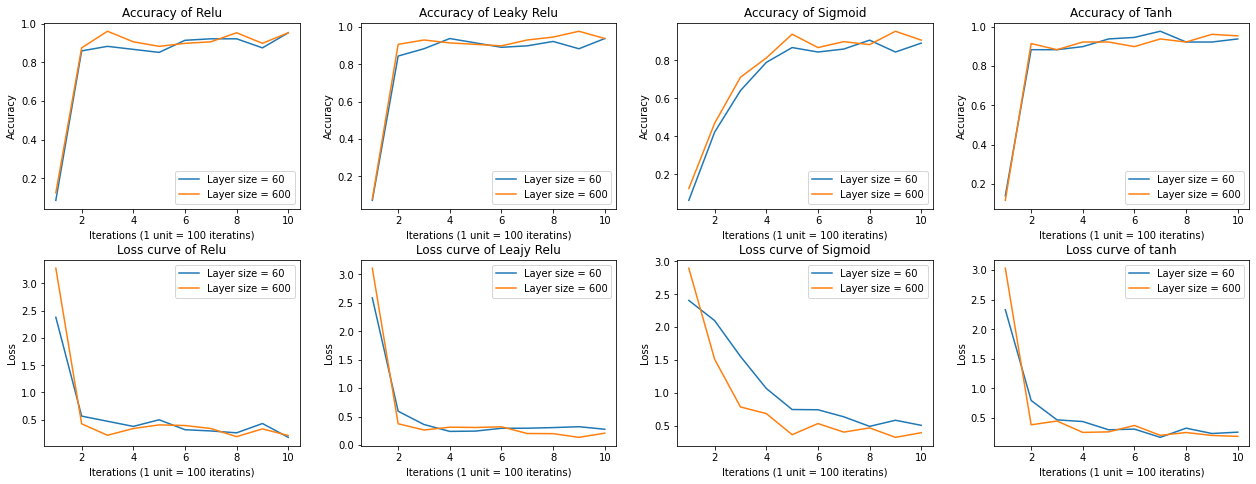

In [154]:
x = list(range(1, 11))
figures, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,7))

figures.tight_layout(pad=3.0)

axes[0,0].plot(x,acc_relu_h60,label = "Layer size = 60")
axes[0,0].plot(x,acc_relu_h600,label = "Layer size = 600")
axes[0,0].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].set_title("Accuracy of Relu")
axes[0,0].legend()


axes[0,1].plot(x,acc_LeakyRelu_h60,label = "Layer size = 60")
axes[0,1].plot(x,acc_LeakyRelu_h600,label = "Layer size = 600")
axes[0,1].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[0,1].set_ylabel("Accuracy")
axes[0,1].set_title("Accuracy of Leaky Relu")
axes[0,1].legend()

axes[0,2].plot(x,acc_sig_h60,label = "Layer size = 60")
axes[0,2].plot(x,acc_sig_h600,label = "Layer size = 600")
axes[0,2].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[0,2].set_ylabel("Accuracy")
axes[0,2].set_title("Accuracy of Sigmoid")
axes[0,2].legend()

axes[0,3].plot(x,acc_tanh_h60,label = "Layer size = 60")
axes[0,3].plot(x,acc_tanh_h600,label = "Layer size = 600")
axes[0,3].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[0,3].set_ylabel("Accuracy")
axes[0,3].set_title("Accuracy of Tanh")
axes[0,3].legend()

axes[1,0].plot(x,loss_relu_h60,label = "Layer size = 60")
axes[1,0].plot(x,loss_relu_h600,label = "Layer size = 600")
axes[1,0].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[1,0].set_ylabel("Loss")
axes[1,0].set_title("Loss curve of Relu")
axes[1,0].legend()

axes[1,1].plot(x,loss_LeakyRelu_h60,label = "Layer size = 60")
axes[1,1].plot(x,loss_LeakyRelu_h600,label = "Layer size = 600")
axes[1,1].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[1,1].set_ylabel("Loss")
axes[1,1].set_title("Loss curve of Leajy Relu")
axes[1,1].legend()

axes[1,2].plot(x,loss_sig_h60,label = "Layer size = 60")
axes[1,2].plot(x,loss_sig_h600,label = "Layer size = 600")
axes[1,2].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[1,2].set_ylabel("Loss")
axes[1,2].set_title("Loss curve of Sigmoid")
axes[1,2].legend()

axes[1,3].plot(x,loss_tanh_h60,label = "Layer size = 60")
axes[1,3].plot(x,loss_tanh_h600,label = "Layer size = 600")
axes[1,3].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[1,3].set_ylabel("Loss")
axes[1,3].set_title("Loss curve of tanh")
axes[1,3].legend()

# ***Training and Testing Model - 0***

*   **Activation_Func = Relu**
*   **Num_HiddenLayer = 1**
*   **HiddenLayer_size = 60**
*   **Initialisation = zero weights and bias**

In [155]:
#W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
#b = tf.Variable(np.zeros(10, dtype=np.float32))
#size of the layer = 60
W = tf.Variable(np.zeros([784, 60]).astype(np.float32))
b = tf.Variable(np.zeros(60, dtype=np.float32))

# 1 hidden layer
W1 = tf.Variable(np.zeros([60, 10]).astype(np.float32))
b1 = tf.Variable(np.zeros([10]).astype(np.float32))

#Keeping the record of Loss and Accuracy after 100 iterations
acc_relu_h60_0=[]
loss_relu_h60_0=[]

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        #logits = tf.matmul(img_batch, W) + b
        #Output of hidden layer 1
        h1 = tf.keras.activations.relu( (tf.matmul(img_batch, W) + b) ,alpha = 0.0, max_value = None, threshold = 0)
        #input to the output layer
        logits = tf.matmul(h1, W1) + b1
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b, W1, b1])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    W1.assign_sub(learning_rate * grads[2])
    b1.assign_sub(learning_rate * grads[3])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        acc_relu_h60_0.append(acc.numpy())
        loss_relu_h60_0.append(xent.numpy())
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3025853633880615 Accuracy: 0.078125
Loss: 2.3026814460754395 Accuracy: 0.1015625
Loss: 2.297412157058716 Accuracy: 0.1328125
Loss: 2.300258159637451 Accuracy: 0.1015625
Starting new epoch...
Loss: 2.2991342544555664 Accuracy: 0.125
Loss: 2.303483486175537 Accuracy: 0.1015625
Loss: 2.3021373748779297 Accuracy: 0.09375
Loss: 2.2997889518737793 Accuracy: 0.125
Loss: 2.301464319229126 Accuracy: 0.109375
Starting new epoch...
Loss: 2.2985143661499023 Accuracy: 0.1328125


In [156]:
#test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1, output_type=tf.int32)
input_h1 = tf.matmul(data.test_data, W) + b
output_h1 = tf.keras.activations.relu(input_h1, alpha = 1.0, max_value = None, threshold = 0)
test_preds = tf.argmax(tf.matmul(output_h1, W1) + b1, axis=1, output_type=tf.int32)

#acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print(acc)

tf.Tensor(0.1135, shape=(), dtype=float32)


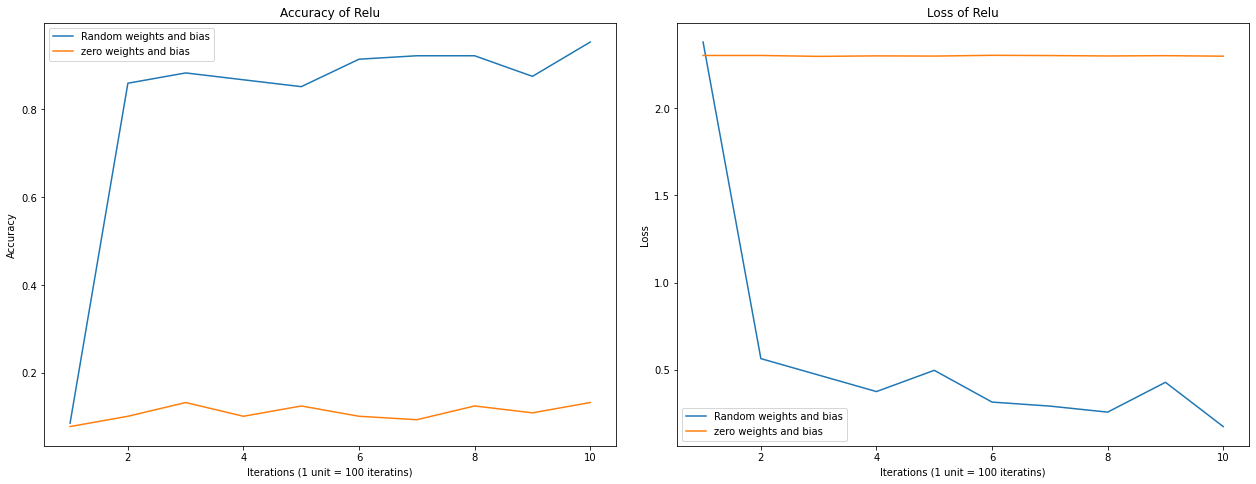

In [157]:
x = list(range(1, 11))

figures, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,7))

figures.tight_layout(pad=3.0)

axes[0].plot(x,acc_relu_h60,label = "Random weights and bias")
axes[0].plot(x,acc_relu_h60_0,label = "zero weights and bias")
axes[0].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy of Relu")
axes[0].legend()

axes[1].plot(x,loss_relu_h60,label = "Random weights and bias")
axes[1].plot(x,loss_relu_h60_0,label = "zero weights and bias")
axes[1].set_xlabel("Iterations (1 unit = 100 iteratins)")
axes[1].set_ylabel("Loss")
axes[1].set_title("Loss of Relu")
axes[1].legend()



# ***Initializing variables to 0 will not work for multilayer perceptrons. You need to initialize values randomly instead (e.g. random_uniform between -0.1 and 0.1).Why do you think this is the case?***

*Answer : The logic of back propagation lies in the fact that we update the weight in each iteration by multiplying the current weight by the delta determined by back propagation. When the initial weight was set to zero, any delta value will not have effect on the weights, as the weights are always zero*

# **Observations**

1. Changing the size of the hidden layer, did not significantly contribute to the increase in accuracy, as the small increase in accuracy compared to the huge jump in nsize of the model is not worth it. 
2. Activation Function: We have tried ReLu, LeakyReLu, Sigmoid and Hyperbolic Tangent, except Sigmoid all other activations gave almost similar accuracy at or around 92%. 
3. We infered that probably due the squashing issue with Sigmoid, could have contributed to the lower accuracy.